In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
raw_industrial = pd.read_excel(r'OECDOutlierRemoved.xlsx', index_col=0)
raw_industrial.index = pd.to_datetime(raw_industrial.index)

raw_industrial.isna().sum() 

Value    9
dtype: int64

In [19]:
def zscore(s, window, thresh=1.96, return_all=False):
    roll = s.rolling(window=window, min_periods=1, center=True)
    avg = roll.mean()
    std = roll.std(ddof=1)
    z = s.sub(avg).div(std)   
    m = z.between(-thresh, thresh)
    
    if return_all:
        return z, avg, std, m
    return s.where(m, avg)

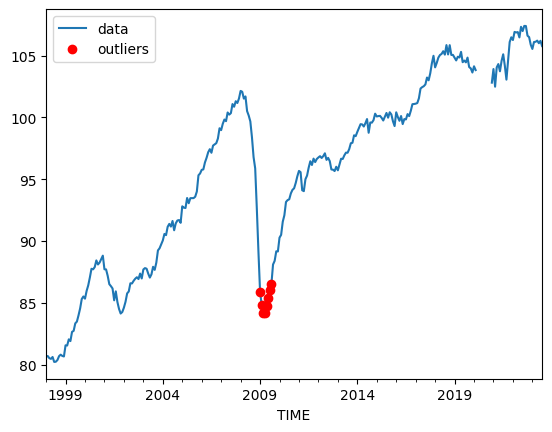

In [20]:
z, avg, std, m = zscore(raw_industrial['Value'], window=100, return_all=True)

ax = plt.subplot()

raw_industrial['Value'].plot(label='data')
raw_industrial.loc[~m, 'Value'].plot(label='outliers', marker='o', ls='', color='r')
# avg.plot(label='mean')
# avg[~m].plot(label='replacement', marker='o', ls='')
plt.legend()

In [21]:
z

TIME
1998-01-01   -1.298140
1998-02-01   -1.301908
1998-03-01   -1.384264
1998-04-01   -1.424156
1998-05-01   -1.389482
                ...   
2023-03-01    0.672413
2023-04-01    0.729447
2023-05-01    0.554135
2023-06-01    0.685696
2023-07-01    0.357939
Name: Value, Length: 307, dtype: float64

In [16]:
raw_industrial.loc[~m, 'Value']

TIME
2009-01-01    85.91997
2009-02-01    84.80988
2009-03-01    84.16413
2009-04-01    84.15932
2009-05-01    84.78716
2009-06-01    85.39549
2009-07-01    86.07258
2009-08-01    86.52922
2020-04-01    83.85961
2020-05-01    87.30959
2020-06-01    93.60803
Name: Value, dtype: float64

<AxesSubplot: xlabel='TIME'>

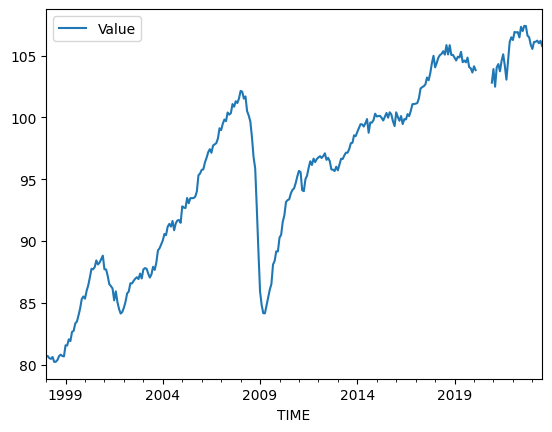

In [23]:
raw_industrial = pd.read_excel(r'OECDOutlierRemoved.xlsx', index_col=0)
raw_industrial.index = pd.to_datetime(raw_industrial.index)

raw_industrial.plot() 

<AxesSubplot: xlabel='TIME'>

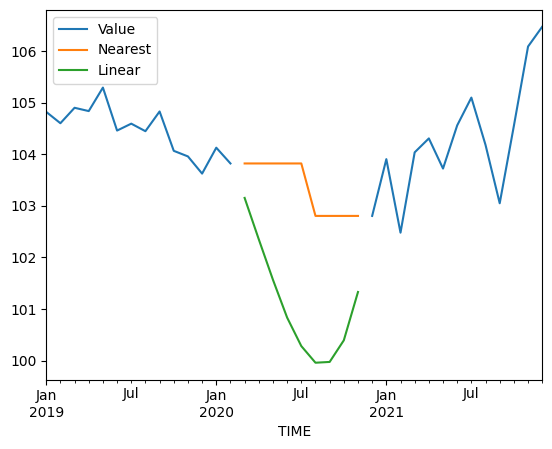

In [24]:
raw_industrial['Nearest'] = raw_industrial['Value'].interpolate(method='nearest')
raw_industrial['Linear'] = raw_industrial['Value'].interpolate(method='cubic')

mask = ~raw_industrial['Value'].isnull()
raw_industrial.loc[mask, raw_industrial.columns.difference(['Value'])] = np.nan

raw_industrial['2019':'2021'].plot()

<AxesSubplot: xlabel='TIME'>

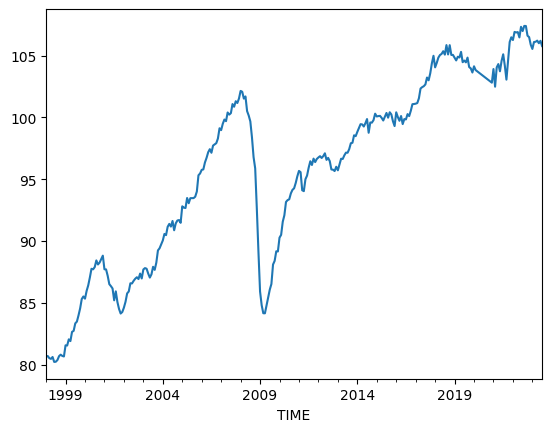

In [26]:
industrialInterpolated =  raw_industrial['Value'].interpolate(method='linear')

industrialInterpolated.plot()

In [114]:
industrialInterpolated.to_excel('OECDInterpolated.xlsx')

In [88]:
raw_industrial['2019':'2021']


# Set all columns other than 'Value' to NaN for rows where 'Value' is not NaN
